# Conjoint Analysis: Handling a Large Number of Attributes in Conjoint Study

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import conjoint

In [265]:
# reloading conjoint
# if there are any further improvement

import importlib
importlib.reload(conjoint)

<module 'conjoint' from '/Users/taufiqurrohman/Documents/gigabank/survey-pricing-230419/result_analysis/github/conjoint.py'>

In [226]:
# ignoring the warnings
# some of the is going to deprecated, like append and merge from pandas

import warnings
warnings.filterwarnings('ignore')

## Conjoint Analysis

    Reading dataframe for conjoint analysis

The data here in general should be the same with what it's shown below. At least, it has to have:
- x variables, which are ['price', 'brand', 'keyless', 'electric', 'warranty']
- y variable, which is 'chosen'

This format of this data was obtained from cbcTools Package in R by John Paul Helveston. Please take a look at his documentation about that library <a href='https://github.com/jhelvy/cbcTools'>here.</a> 

In [227]:
df_choice = pd.read_csv('car_choice_example.csv')
df_choice.head(5)

,profileID,respID,qID,altID,obsID,price,brand,keyless,electric,warranty,blockID,label,chosen
0,14,0,1,1,1,above 50k,japan,No,Yes,No,1,A Car,0
1,48,0,1,2,1,10k - 50k,europe,Yes,Yes,Yes,1,B Car,0
2,31,0,1,3,1,below 10k,japan,Yes,No,Yes,1,C Car,1
3,23,0,2,1,2,above 50k,europe,Yes,Yes,No,1,D Car,1
4,45,0,2,2,2,10k - 50k,japan,Yes,Yes,Yes,1,E Car,0


    Making conjoint_simple_analysis instance

Making the instance for conjoint analysis. Most important things, pass the x and y variable. Another thing to take a look is anchor_var. As the model used in this analysis is logistic regression, **we can specify the reference category (or anchor category) by ourself**. If you don't know the name of the anchor_var, please follow steps below:

1. Create conjoint_simple_analysis() instance by setting attrbute compare_all=True.
2. It will show all the variables, after it gets dummied.
3. Choose variables you want to keep (the opposite of anchor), and pass it to 'anchor_var'.

In [233]:
target_var = 'chosen'
x_var = ['price', 'brand', 'keyless', 'electric', 'warranty']
anchor_var = ['price_10k - 50k', 'price_above 50k', 'brand_europe', 'keyless_Yes', 'electric_Yes', 'warranty_Yes']

conjoint_analysis = conjoint.conjoint_simple_analysis(df_choice, 
                                                      target_var=target_var,
                                                      predictor_var=x_var,
                                                      anchor_var=anchor_var,
                                                      compare_all='specific')

In [234]:
# calling show_x can give us how the predictor data looks like

conjoint_analysis.show_x.head(5)

,price_10k - 50k,price_above 50k,brand_europe,keyless_Yes,electric_Yes,warranty_Yes
0,0,1,0,0,1,0
1,1,0,1,1,1,1
2,0,0,0,1,0,1
3,0,1,1,1,1,0
4,1,0,0,1,1,1


In [235]:
# calling show_y can give us how the target data looks like

list(conjoint_analysis.show_y.head(5))

[0, 0, 1, 1, 0]

In [236]:
# calling regression method will show the result of regression
# from statsmodels.api

conjoint_analysis.regression()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 chosen   R-squared (uncentered):                   0.443
Model:                            OLS   Adj. R-squared (uncentered):              0.442
Method:                 Least Squares   F-statistic:                              357.6
Date:                Thu, 01 Jun 2023   Prob (F-statistic):                        0.00
Time:                        18:21:52   Log-Likelihood:                         -1540.6
No. Observations:                2700   AIC:                                      3093.
Df Residuals:                    2694   BIC:                                      3129.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
price_10k - 50k    -0.1683      0.020     -8.418      0.000      -0.207      -0.129
price_above 50k    -0.2228      0.019    -11.801      0.000      -0.260      -0.186
brand_europe        0.1485      0.015      9.830      0.000       0.119       0.178
keyless_Yes         0.1998      0.015     12.967      0.000       0.170       0.230
electric_Yes        0.2690      0.016     17.101      0.000       0.238       0.300
warranty_Yes        0.1840      0.016     11.698      0.000       0.153       0.215
==============================================================================
Omnibus:                      447.026   Durbin-Watson:                   2.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.096
Skew:                           0.539   Prob(JB):                     4.37e-48
Kurtosis:                       2.120   Cond. No.                         3.99
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

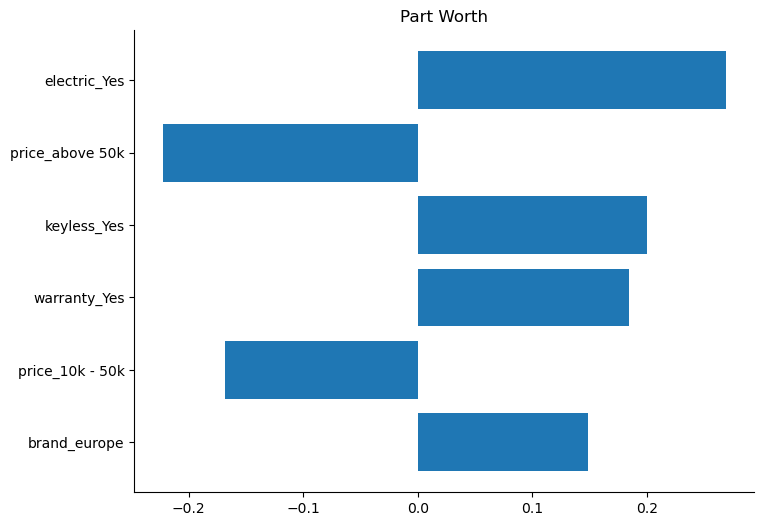

In [237]:
# calling plot mehod will show the result of regression
# in form of part worth plot

conjoint_analysis.plot(figsize=(8, 6))

    Create a new product mix

By calling prob_mix() method, we can calculate the total part worth of a new product that we can think of. We can mix-match and combine all the product attributes and calculate its total part worth to see how likely people would be interested with the idea of a new product.

In [242]:
# create the combination first

combs = {'car_a':['electric_Yes',
                  'keyless_Yes',
                  'warranty_Yes'],
         'car_b':['price_above 50k', 
                  'electric_Yes',
                  'keyless_Yes',
                  'warranty_Yes'],
         'car_c':['keyless_Yes',
                  'warranty_Yes'],
         }

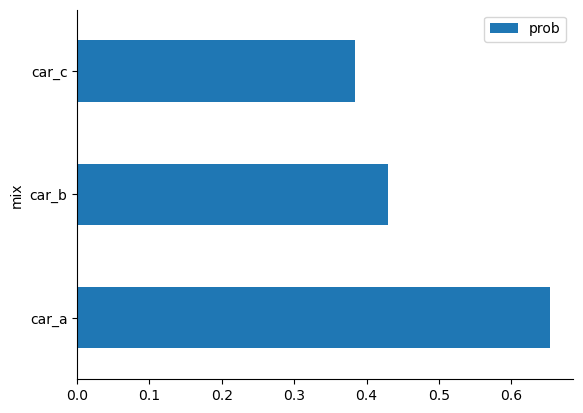

In [243]:
# create a mix_df as a container for all the values for prob_mix
# combine between for-loops and conjoint_analysis.prob_mix()

mix_df = pd.DataFrame(columns=['mix', 'prob'])

for i, comb in enumerate(combs):
    val = conjoint_analysis.prob_mix(combs[comb])  # here is the function of prob_mix
    mix_df.loc[i, 'mix'] = comb
    mix_df.loc[i, 'prob'] = val

mix_df.set_index('mix').plot(kind='barh')
sns.despine()

    We can compare all the attributes without dropping one of the variables during dummying process, but...

- There may be cases where you want to explicitly compare all categories against each other, rather than against a reference category. 
- In such situations, you can include all the dummy variables, 
- But you need to be aware of the consequences, such as the loss of interpretability of individual dummy coefficients and the potential for multicollinearity issues.

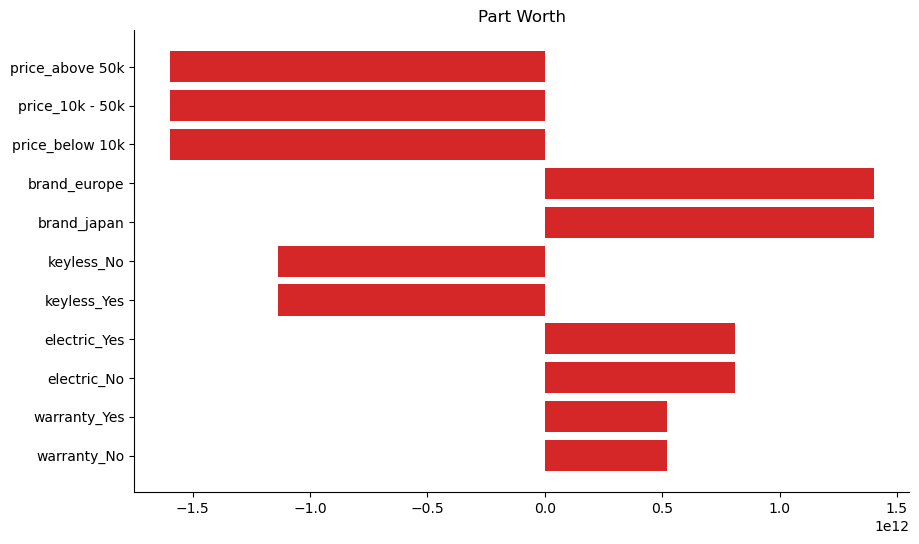

In [284]:
conjoint_analysis = conjoint.conjoint_simple_analysis(df_choice, 
                                                      target_var=target_var, 
                                                      predictor_var=x_var,
                                                      compare_all=True)  # set compare_all parameter to True

conjoint_analysis.plot(figsize=(10,6))

## Extended Conjoint with Symbridge Analysis

    Reading dataframe for conjoint analysis

The data here shows all in a 5-likert scale on the importance of the attributes to the person when it comes to the car. In the extended conjoint analysis context, this is the second stage where we're simply asking them on their rating for several attributes.

In [245]:
df_rating = pd.read_csv('car_rating_example.csv')
df_rating.head(5)

,brand,electric,speed,driving_range,service_center,sunroof
0,2.0,5.0,3.0,1.0,5.0,3.0
1,2.0,5.0,3.0,3.0,3.0,3.0
2,2.0,2.0,3.0,2.0,3.0,2.0
3,3.0,2.0,2.0,2.0,3.0,2.0
4,3.0,5.0,2.0,2.0,1.0,3.0


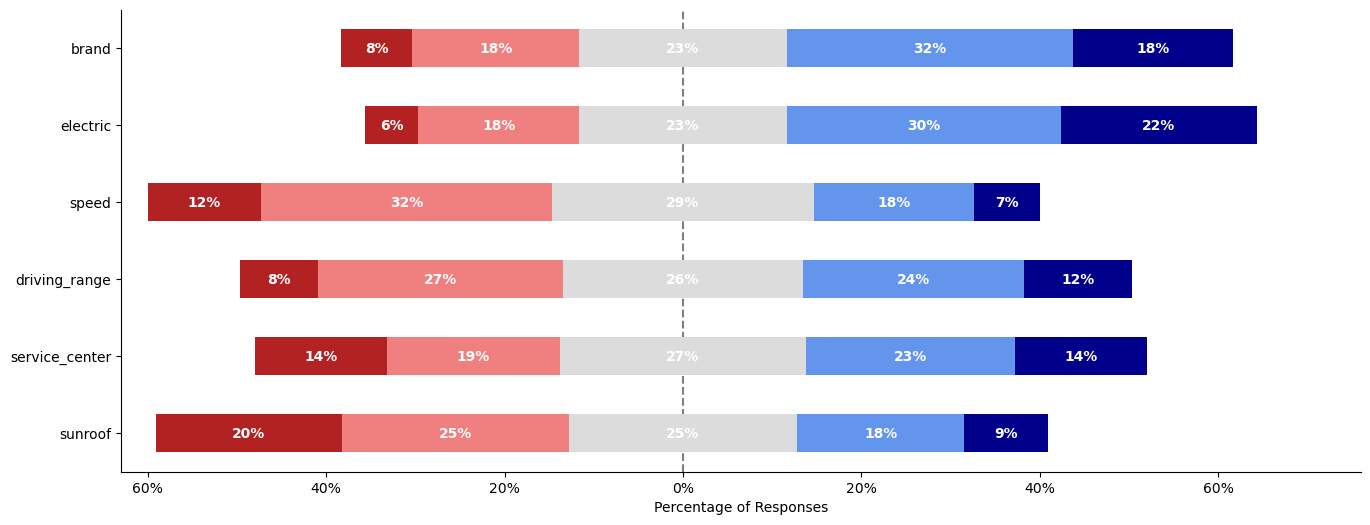

In [246]:
# show the distribution of importance rating
# using plot_likert library

import plot_likert

plot_likert.plot_likert(df_rating, plot_scale=[1,2,3,4,5], 
                        xtick_interval=20, 
                        plot_percentage=True, 
                        xlim=(-1,1), 
                        legend=None, 
                        figsize=(16,6), 
                        bar_labels=True)

sns.despine()

    Making symbridge_extended_analysis instance

Making the instance for conjoint analysis. Most important things, pass the x and y variable. Another thing to take a look is anchor_var. As the model used in this analysis is logistic regression, we can specify the reference category (or anchor category) by ourself. 

**This one is really important!** Specifically for symbridge_extended_analysis, please **specify the the reference category in according to the question of the rating**, as it will affect the calculation. So let's say for example:

- If you ask how important a car to be a European brand, then specify the anchor for conjoint as "brand_japan", not "brand_europe".
- If you ask how important is a keyless feature for a car, then specify the anchor for conjoint as "keyless_no", not "keyless_yes".

For the example, please take a look below:

In [260]:
# define all variables needed

target_var = 'chosen'
x_var = ['price', 'brand', 'keyless', 'electric', 'warranty']
bridge_var = ['brand', 'electric']

# here in anchor_var, we make keyless_no, electric_no, etc. as the anchor
# thus, we're calculating the estimate effect size for the "yes" features

anchor_var = ['price_10k - 50k', 'price_above 50k', 'brand_europe', 'keyless_Yes', 'electric_Yes', 'warranty_Yes']

In [266]:
sym_analysis = conjoint.symbridge_extended_analysis(df_conjoint=df_choice, 
                                                    df_rating=df_rating, 
                                                    target_var=target_var, 
                                                    predictor_var=x_var, 
                                                    bridge_var=bridge_var,
                                                    anchor_var=anchor_var,
                                                    resp_var='respID',
                                                    compare_all='specific')

In [267]:
# show individual utility dataframe
# calculated for each individual using logistic regression

sym_analysis.ind_utils_dataframe()

,respID,stage_1_price_10k - 50k,stage_1_price_above 50k,stage_1_brand_europe,stage_1_keyless_Yes,stage_1_electric_Yes,stage_1_warranty_Yes,stage_2_brand,stage_2_electric,stage_2_speed,stage_2_driving_range,stage_2_service_center,stage_2_sunroof
0,0,-0.7545,-0.4953,0.2078,0.4210,0.4024,0.1524,2.0,5.0,3.0,1.0,5.0,3.0
1,1,-0.2047,-0.3082,0.2864,0.2132,0.4395,-0.0605,2.0,5.0,3.0,3.0,3.0,3.0
2,2,-0.7256,-0.2864,-0.0773,0.5113,0.3175,0.3175,2.0,2.0,3.0,2.0,3.0,2.0
3,3,-0.7196,-0.2926,0.3123,0.2833,0.2809,0.2809,3.0,2.0,2.0,2.0,3.0,2.0
4,4,-0.0672,-0.2342,-0.2571,0.0459,0.4988,0.4988,3.0,5.0,2.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,-0.2560,-0.2981,0.2366,-0.0412,0.6239,0.1239,3.0,5.0,3.0,4.0,5.0,2.0
146,146,-0.7545,-0.4953,0.2078,0.4210,0.4024,0.1524,4.0,4.0,3.0,2.0,4.0,2.0
147,147,0.1051,-0.0661,0.5564,0.2023,-0.0136,-0.0136,4.0,4.0,3.0,4.0,4.0,4.0
148,148,-0.0672,-0.2342,-0.2571,0.0459,0.4988,0.4988,3.0,3.0,2.0,3.0,3.0,3.0


In [268]:
# make a part worth for individual utility using symbridge analysis
# this is where symbridge calculation comes in
# it will calculate the first stage, as well as the second stage

sym_analysis.ind_analysis()

,respID,stage_1_price_10k - 50k,stage_1_price_above 50k,stage_1_brand_europe,stage_1_keyless_Yes,stage_1_electric_Yes,stage_1_warranty_Yes,stage_2_brand,stage_2_electric,stage_2_speed,...,stage_1_tf_speed,fin_speed,stage_1_tf_driving_range,fin_driving_range,stage_1_tf_service_center,fin_service_center,stage_1_tf_sunroof,fin_sunroof,fin_brand,fin_electric
0,0,-0.7545,-0.4953,0.2078,0.4210,0.4024,0.1524,2.0,5.0,3.0,...,0.261514,3.261514,0.087171,1.087171,0.435857,5.435857,0.261514,3.261514,2.558151,5.052049
1,1,-0.2047,-0.3082,0.2864,0.2132,0.4395,-0.0605,2.0,5.0,3.0,...,0.311100,3.311100,0.311100,3.311100,0.311100,3.311100,0.311100,3.311100,2.969213,4.756687
2,2,-0.7256,-0.2864,-0.0773,0.5113,0.3175,0.3175,2.0,2.0,3.0,...,0.180150,3.180150,0.120100,2.120100,0.180150,3.180150,0.120100,2.120100,-1.167161,5.407361
3,3,-0.7196,-0.2926,0.3123,0.2833,0.2809,0.2809,3.0,2.0,2.0,...,0.237280,2.237280,0.237280,2.237280,0.355920,3.355920,0.237280,2.237280,2.988253,2.604947
4,4,-0.0672,-0.2342,-0.2571,0.0459,0.4988,0.4988,3.0,5.0,2.0,...,0.060425,2.060425,0.060425,2.060425,0.030213,1.030212,0.090638,3.090638,-8.419085,16.660785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,-0.2560,-0.2981,0.2366,-0.0412,0.6239,0.1239,3.0,5.0,3.0,...,0.322688,3.322687,0.430250,4.430250,0.537813,5.537813,0.215125,2.215125,2.522339,6.338161
146,146,-0.7545,-0.4953,0.2078,0.4210,0.4024,0.1524,4.0,4.0,3.0,...,0.228825,3.228825,0.152550,2.152550,0.305100,4.305100,0.152550,2.152550,3.029453,5.580747
147,147,0.1051,-0.0661,0.5564,0.2023,-0.0136,-0.0136,4.0,4.0,3.0,...,0.203550,3.203550,0.271400,4.271400,0.271400,4.271400,0.271400,4.271400,8.471842,0.070958
148,148,-0.0672,-0.2342,-0.2571,0.0459,0.4988,0.4988,3.0,3.0,2.0,...,0.080567,2.080567,0.120850,3.120850,0.120850,3.120850,0.120850,3.120850,-6.261442,12.503142


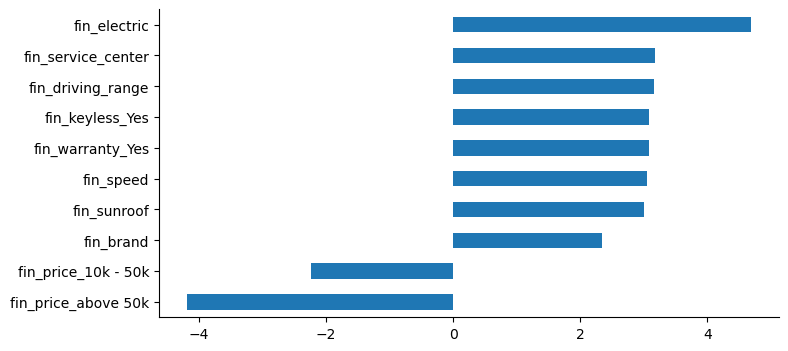

In [269]:
sym_analysis.plot_overall(method='50%', figsize=(8,4))

    Create a new product mix

Like previous one (conjoint_simple_analysis instance), by calling prob_mix() method, we can calculate the total part worth of a new product that we can think of. We can mix-match and combine all the product attributes and calculate its total part worth to see how likely people would be interested with the idea of a new product.

In [279]:
combs = {'car_a':['fin_electric',
                  'fin_sunroof',
                  'fin_speed',
                  'fin_keyless_Yes',
                  'fin_warranty_Yes'],
         'car_b':['fin_price_above 50k', 
                  'fin_electric',
                  'fin_keyless_Yes',
                  'fin_warranty_Yes'],
         'car_c':['fin_keyless_Yes']
         }

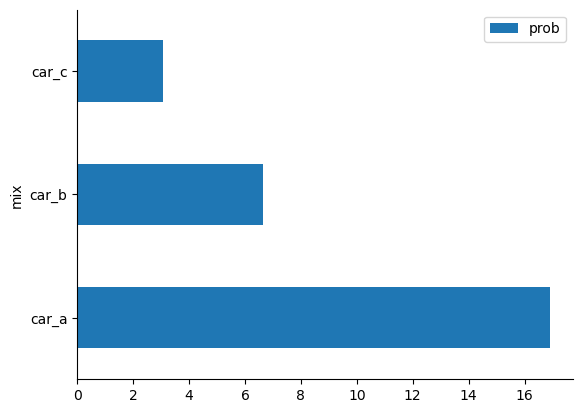

In [280]:
mix_df = pd.DataFrame(columns=['mix', 'prob'])

for i, comb in enumerate(combs):
    val = sym_analysis.prob_mix(combs[comb], method='median')
    mix_df.loc[i, 'mix'] = comb
    mix_df.loc[i, 'prob'] = val

mix_df.set_index('mix').plot(kind='barh')
sns.despine()